In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [30]:
df = pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [31]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [32]:
df.shape

(299, 28)

In [33]:
categorical_data = df.select_dtypes(include=['object','category'])
numerical_data = df.select_dtypes(include=['int','float'])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0],inplace=True)


for x in numerical_data:
    df[x].fillna(np.mean(df[x]), inplace=True)
df.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [34]:
category = df.select_dtypes(include=['object','category'])
encoder = LabelEncoder()
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,...,45.0,8.4,1,3.039604,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,...,50.0,85.0,1,2.000000,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,1,3.039604,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.300000,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,1,2,2,2,...,74.0,7.4,1,3.039604,0,0,4300,0,0,0


In [35]:
df.drop('hospital_number',axis =1, inplace=True)

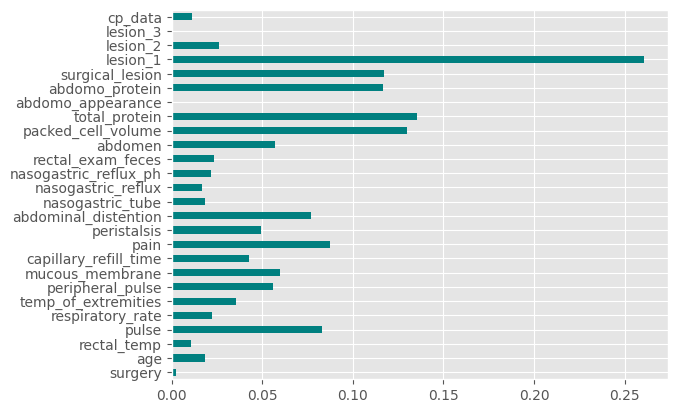

In [36]:
X = df.drop(['outcome'],axis = 1)
Y = df['outcome']
from sklearn.feature_selection import mutual_info_classif
plt.style.use('ggplot')
importance = mutual_info_classif(X,Y)
feature_impor = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impor.plot(kind = 'barh', color = 'teal') 
plt.show()

In [37]:
from sklearn.utils import resample
df_0 = df[df['outcome'] == 0]
df_1 = df[df['outcome'] == 1]
df_2 = df[df['outcome'] == 2]

df0_sam = resample(df_0, n_samples=2000)
df1_sam = resample(df_1, n_samples=2000)
df2_sam = resample(df_2, n_samples=2000)

df = pd.concat([df0_sam,df1_sam])
df = df.sample(frac = 1, ignore_index=True)
X = df.drop(['outcome'],axis = 1)
Y = df['outcome']

In [38]:
xtrain, xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2,random_state=1)

In [39]:
from sklearn.pipeline import Pipeline
logreg = KNeighborsClassifier()

In [40]:
logreg.fit(xtrain,ytrain)

KNeighborsClassifier()

In [41]:
pred1 = logreg.predict(xtest)
pred1

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [42]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       406

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [43]:
print(precision_score(ytest,pred1, average = 'weighted'))
print(recall_score(ytest,pred1, average = 'weighted'))
print(f1_score(ytest,pred1, average ='weighted'))

1.0
1.0
1.0
